6

In [14]:
z_scores = np.abs(stats.zscore(kidney_num))
outliers = np.where(z_scores > 3 )
outliers

df_outliers = kidney[(z_scores < 3).all(axis=1)]


7

In [15]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [16]:
x = kidney.drop('classification', axis=1)
pca_x = PCA()
pca_loadings = pd.DataFrame(pca_x.fit(x).components_.T,index=x.columns)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,0.058006,0.056895,-0.033944,-0.945825,-0.268983,0.155293,0.030512,-0.008964,-0.007344,0.004560,...,0.000233,0.001883,-0.004553,-0.001049,-0.002577,-0.001445,0.002153,0.000518,-0.000659,0.000023
bp,0.030660,0.045319,0.007901,-0.190429,0.900768,0.381385,-0.025256,0.048872,-0.010507,0.001694,...,-0.002060,0.000593,-0.000882,0.000758,0.001036,-0.004283,0.000493,-0.001329,-0.000561,0.000001
sg,-0.000023,-0.000021,-0.000003,0.000027,-0.000045,0.000041,-0.000062,0.000115,0.000075,0.000009,...,-0.000611,-0.000883,0.000532,-0.000168,0.000791,0.000202,0.002320,0.000531,-0.001443,0.999994
al,0.005596,0.007727,0.002353,0.001354,0.007739,-0.013794,0.009088,-0.022200,-0.049443,0.027416,...,-0.162658,-0.095821,-0.077707,-0.087830,0.027924,-0.035533,0.029493,-0.008487,-0.056031,0.000826
su,0.008633,-0.000161,-0.000271,-0.002234,0.005024,0.004772,-0.004660,-0.001049,0.027762,0.048451,...,0.089545,-0.023229,-0.008048,-0.025419,-0.022953,0.050321,-0.014545,-0.000119,-0.011807,0.000793
rbc,-0.000678,-0.001356,-0.000521,-0.000799,-0.002772,-0.000294,-0.002714,0.007165,0.005521,0.010585,...,-0.012221,-0.274527,0.245481,-0.399026,0.264389,-0.673336,-0.187698,0.249757,-0.274975,-0.000681
pc,-0.001443,-0.002382,-0.001046,0.000464,-0.003116,0.003731,0.000015,0.004658,0.008678,-0.012165,...,-0.310824,-0.539893,-0.425012,-0.197308,0.232375,-0.028410,0.075745,-0.313595,0.459281,-0.000186
pcc,0.000859,0.000959,0.000901,-0.001666,-0.000245,-0.001134,0.001824,-0.004377,-0.012098,-0.002755,...,0.076532,0.396742,0.444805,-0.205635,0.155033,-0.157810,-0.193583,-0.564941,0.427439,0.001538
ba,0.000284,0.000699,0.000844,-0.000237,0.001325,-0.000205,0.000090,-0.000954,-0.005650,-0.002736,...,0.014881,0.164206,0.014014,0.029346,0.111577,-0.045158,-0.051111,0.701319,0.676953,0.000893
bgr,0.986800,-0.149007,0.010159,0.057390,-0.018217,0.008223,-0.007846,0.006058,0.003619,-0.002522,...,0.000042,-0.000149,-0.000648,0.000371,0.000204,-0.000878,0.000329,-0.000042,0.000350,0.000004


In [17]:
pc_scores = pd.DataFrame(pca_x.fit_transform(x),index=x.index)
pc_scores

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-26.772640,-17.249330,-5.998251,-0.828452,6.116403,-2.089258,-0.628556,2.596333,-0.572016,0.651172,...,-0.477897,-0.401542,0.450894,-0.067887,-0.139491,0.213532,-0.171422,0.062243,0.005370,-0.001025
1,-32.897839,-38.590115,8.938034,44.581619,-12.065710,-9.806733,5.463283,-12.064720,0.278495,0.501925,...,-0.669475,-0.417085,-0.279821,-0.285807,0.266800,-0.097275,-0.096493,0.005849,-0.240170,0.005158
2,274.491034,-45.030400,-4.772077,6.214051,-4.685127,8.590082,2.126044,-14.684569,0.249451,-0.494540,...,0.194728,0.006403,-0.796461,-1.111413,0.075235,-0.077410,0.480209,0.121222,-0.169557,-0.002281
3,-26.952530,6.713385,7.223322,-1.871626,3.186672,-23.909402,20.640606,4.405011,-7.853036,1.673151,...,1.019920,-0.144294,0.616446,-0.616259,-0.185674,-0.185936,0.241995,-0.318776,-0.002597,-0.007985
4,-42.343185,-23.088329,0.856084,-7.912834,9.464657,-10.956912,-0.923558,-1.837604,0.251580,0.554208,...,-0.432835,-0.059076,-0.432199,-0.100047,0.094030,-0.234240,-0.044727,-0.056674,-0.122069,-0.005827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-6.120398,-7.152612,3.183976,-4.849067,1.262646,3.339825,-13.078209,4.430664,2.107390,-0.618646,...,-0.064014,0.042818,-0.051035,-0.002641,-0.013804,-0.083895,0.059652,-0.029909,0.024567,-0.001399
396,-74.160640,-17.824884,-9.419311,6.910467,-4.712245,4.889970,-0.325708,4.617029,-0.109816,-0.531034,...,0.012865,0.012701,0.147711,-0.059610,-0.043887,0.063970,0.063931,0.025890,-0.006434,0.002648
397,-51.275710,-25.949086,5.311252,32.443962,14.303290,-2.357949,0.502650,5.744913,-0.935972,0.859351,...,0.005143,-0.040775,0.166033,0.013236,0.053251,0.023768,-0.013168,-0.026392,0.032012,-0.002115
398,-34.504319,-5.904146,-3.646997,35.656078,-7.581936,-4.663116,2.666075,4.325269,-2.292242,1.125528,...,-0.031647,-0.019025,0.080361,0.038988,0.067378,0.060249,-0.087018,0.003096,0.020712,0.004101


In [18]:
pc_scores[0]

0      -26.772640
1      -32.897839
2      274.491034
3      -26.952530
4      -42.343185
          ...    
395     -6.120398
396    -74.160640
397    -51.275710
398    -34.504319
399    -19.497707
Name: 0, Length: 400, dtype: float64

In [19]:
km = KMeans(n_clusters=2,n_init=20,random_state=0)
km.fit(x)
km.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
pd.Series(km.labels_).value_counts()

1    326
0     74
dtype: int64

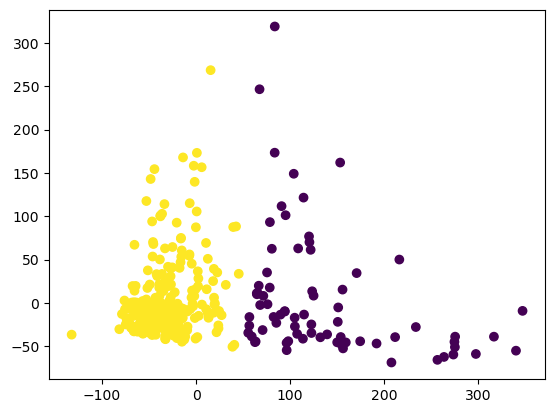

In [21]:
plt.scatter(pc_scores[0],pc_scores[1],c=km.labels_)

8

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = kidney.drop('classification', axis=1)
y = kidney['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



9

Random forest classifier:

Reason for choosing: Random forests are very effective for complex data sets with mixed data types and potential interactions between features. Due to its ensemble approach, it effectively prevents overfitting, making it ideal for medical datasets where accuracy and reliability are critical.

Support vector machine (SVM):

Reason for choice: SVM is powerful for classification problems with clear separation boundaries and is efficient in high-dimensional spaces. It is particularly useful when classes are well separable, and can perform well using suitable kernels even if the data is not linearly separable

10

The F1 score is the harmonic mean of precision and recall. It conveys the balance between precision and recall.
F1 scores are particularly valuable in situations where the balance between precision and recall is important. In medical diagnostics, such as testing for CKD, false positives and false negatives come with significant costs. False negatives may result in missed treatment, while false positives may result in unnecessary medical intervention. F1 scores help ensure you don't over-prioritize one over the other. This metric combines the precision and recall of a classifier into one metric via the harmonic mean. It is best used when false positives and false negatives have similar costs, or when the classes are unbalanced. The F1 score tends to be lower than the accuracy measure because it embeds false positives and false negatives into the calculation.


Accuracy measures the proportion of true results among the total number of cases examined. It is calculated by dividing the number of correct predictions by the total number of predictions.
Accuracy is a simple metric that gives a quick idea of the overall performance of a classifier. It's especially useful when the class is relatively balanced. Accuracy provides a simple measure of effectiveness where correctly classified and misclassified results have similar weights.
Accuracy is an intuitive measure; it is the percentage of correctly predicted instances out of all instances. It provides a measure of how well the classifier performs across all classifications. However, it is important to use this metric with caution, especially in medical applications where the cost of different types of errors (false positives vs. false negatives) may not be the same. For example, incorrectly diagnosing a patient with CKD may have a different impact than missing a diagnosis.